In [5]:
import numpy as np
import cv2
import os
import pickle5
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential, Model, save_model, load_model
from tensorflow.keras.callbacks import EarlyStopping

# Read data & structure

In [6]:
# read images as 3D numpy arrays (RGB)
width, height = 200, 200
X = list()
for file in os.listdir(Path('webdev_ig')):
    path = Path('webdev_ig') / file
    temp = Image.open(str(path))
    temp = temp.resize((width, height), Image.ANTIALIAS)
    np_img = np.array(temp)
    X.append(np_img)

In [7]:
X = np.array(X)

In [8]:
# load likes per image
with open(Path('likes.pkl'), 'rb') as f:
        likes = pickle5.load(f)

In [9]:
y = list(likes.values())

In [10]:
y = np.array(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
inp = Input(shape=(width, height, 3))
conv1 = Conv2D(32, 4, activation='relu')(inp)
pool1 = MaxPool2D((2,2))(conv1)
conv2 = Conv2D(8, 4, activation='relu')(pool1)
pool2 = MaxPool2D((2,2))(conv2)
flat = Flatten()(pool2)
dense = Dense(8)(flat)
out = Dense(1, activation='linear')(dense)

In [13]:
model = Model(inputs = inp, outputs = out, name="InstaPred")
model.summary()

Model: "InstaPred"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 197, 197, 32)      1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 95, 95, 8)         4104      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 17672)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 14

In [14]:
model.compile(optimizer="Adam", loss="mse", metrics=["mae"])

In [24]:
callback = EarlyStopping(monitor='val_loss', patience=10, verbose=0)

In [25]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=8, callbacks=[callback])

Epoch 1/100
4/4 [==============================] - 1s 171ms/step - loss: 10142773.0000 - mae: 2384.0938 - val_loss: 2369087.0000 - val_mae: 1368.4044
Epoch 2/100
4/4 [==============================] - 1s 134ms/step - loss: 12618548.0000 - mae: 2946.8137 - val_loss: 2063274.6250 - val_mae: 1239.0458
Epoch 3/100
4/4 [==============================] - 1s 135ms/step - loss: 8648626.0000 - mae: 1986.5425 - val_loss: 3868208.0000 - val_mae: 1610.0117
Epoch 4/100
4/4 [==============================] - 1s 135ms/step - loss: 5495182.5000 - mae: 1888.6632 - val_loss: 14372700.0000 - val_mae: 3400.7908
Epoch 5/100
4/4 [==============================] - 1s 134ms/step - loss: 2938103.7500 - mae: 1413.5795 - val_loss: 4197756.0000 - val_mae: 1628.9780
Epoch 6/100
4/4 [==============================] - 1s 135ms/step - loss: 4827341.5000 - mae: 1634.6035 - val_loss: 10522029.0000 - val_mae: 2754.1746
Epoch 7/100
4/4 [==============================] - 1s 134ms/step - loss: 2699930.5000 - mae: 1410.1908

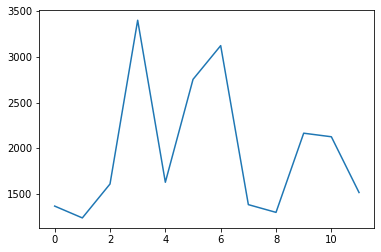

In [26]:
plt.plot(model.history.history['val_mae'])

In [29]:
# save model
save_model(model, filepath=Path('model'))

INFO:tensorflow:Assets written to: model\assets


'model'

In [30]:
# load model
model = load_model(filepath=Path('model'))

In [33]:
def predict(img, model):
    width, height = 200, 200
    temp = img.resize((width, height), Image.ANTIALIAS)
    np_img = np.array(temp)
    np_img = np_img.reshape((1, width, height, 3))
    pred = model.predict(np_img)
    return float(pred[0][0])

In [35]:
# example prediction
img = Image.open(Path('webdev_ig/B2i-42pHaeG.jpg'))
predict(img=img, model=model)

7556.3369140625